# Notebook Contents
<li>Defining The Problem</li>
<li>Importing The Dependencies</li>
<li>Defining The Functions</li>
<li>Preparing The Data Directories</li>
<li>Preprocessing The Data</li>
<li>Building The CNN</li>
<li>CCN Optimization</li>
<li>Preparing Testing Data</li>
<li>Submission</li>

# Defining The Problem

> This project for classify the images as dogs images or cats images, my target in this project is building a CNN for predicting if the image for dog or a cat.

# Importing The Dependencies

In [1]:
# Main libraries
import pandas as pd
from zipfile import ZipFile
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Network
from tensorflow.keras import models
from tensorflow.keras import layers

# Defining The Functions

In [4]:
# For data directories
def extract_files(dir):
    '''
    This function for extracting the files.
    INPUT:
    dir: str. The main file direction.
    OUTPUT:
    Extracted files.
    '''
    with ZipFile(dir,'r') as zip:
        zip.extractall()

def copy_files(rng,path1,name,path2):
    '''
    This function for copying the files from the source to destination.
    INPUT:
    rng: list . A list that contains the ranges.
    path1: str. The data directory.
    name: str. The animal name.
    path2: str. The destination directory
    '''
    fnames = [f'{name}.{idx}.jpg' for idx in range(rng[0],rng[1])]
    for fname in fnames:
        src = os.path.join(path1,fname)
        dst = os.path.join(path2,fname)
        shutil.copyfile(src,dst)

# Preparing The Data Directories

In [5]:
# Extracting the data
train_dir = '../input/dogs-vs-cats/train.zip'
test_dir = '../input/dogs-vs-cats/test1.zip'
extract_files(train_dir)
extract_files(test_dir)
print('Extraction process is done')

Extraction process is done


In [6]:
# The main path
path = '/kaggle/working/'

# Training directory
train_dir = os.path.join(path,'Train')
os.mkdir(train_dir)

# Validation directory
val_dir = os.path.join(path,'Val')
os.mkdir(val_dir)

# Cats training directory
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

# Cats validation directory
val_cats_dir = os.path.join(val_dir,'cats')
os.mkdir(val_cats_dir)

# Dogs training directory
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

# Dogs validation directory
val_dogs_dir = os.path.join(val_dir,'dogs')
os.mkdir(val_dogs_dir)

# Copying training cats and dogs files
copy_files([0,10000],os.path.join(path,'train'),'cat',train_cats_dir)
copy_files([0,10000],os.path.join(path,'train'),'dog',train_dogs_dir)

# Copying validation cats and dogs files
copy_files([10000,12500],os.path.join(path,'train'),'cat',val_cats_dir)
copy_files([10000,12500],os.path.join(path,'train'),'dog',val_dogs_dir)

# Display message
print('Preparing the data directories is done')

Preparing the data directories is done


# Preprocessing The Data

In [7]:
# Creating image generator steps
train_data = ImageDataGenerator(rescale=1/255)
validate_data = ImageDataGenerator(rescale=1/255)
train_generator = train_data.flow_from_directory(directory=train_dir,target_size=(128,128),batch_size=20,class_mode='binary')
validate_generator = validate_data.flow_from_directory(directory=val_dir,target_size=(128,128),batch_size=20,class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


# Building The CNN

In [8]:
# The CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (128,128,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [9]:
# The model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [10]:
# Fitting the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_generator,steps_per_epoch=1000,epochs=20,validation_data=validate_generator,validation_steps=250,verbose=1)

Epoch 1/20
1000/1000 [==============================] - 76s 69ms/step - loss: 0.6364 - accuracy: 0.6238 - val_loss: 0.5089 - val_accuracy: 0.7522
Epoch 2/20
1000/1000 [==============================] - 69s 69ms/step - loss: 0.4773 - accuracy: 0.7699 - val_loss: 0.4566 - val_accuracy: 0.7876
Epoch 3/20
1000/1000 [==============================] - 69s 69ms/step - loss: 0.3924 - accuracy: 0.8225 - val_loss: 0.4260 - val_accuracy: 0.8136
Epoch 4/20
1000/1000 [==============================] - 68s 68ms/step - loss: 0.3109 - accuracy: 0.8634 - val_loss: 0.4015 - val_accuracy: 0.8194
Epoch 5/20
1000/1000 [==============================] - 68s 68ms/step - loss: 0.2000 - accuracy: 0.9173 - val_loss: 0.4826 - val_accuracy: 0.8142
Epoch 6/20
1000/1000 [==============================] - 68s 68ms/step - loss: 0.0961 - accuracy: 0.9653 - val_loss: 0.5611 - val_accuracy: 0.8278
Epoch 7/20
1000/1000 [==============================] - 68s 68ms/step - loss: 0.0483 - accuracy: 0.9833 - val_loss: 0.8768 -

- The over fitting issue.

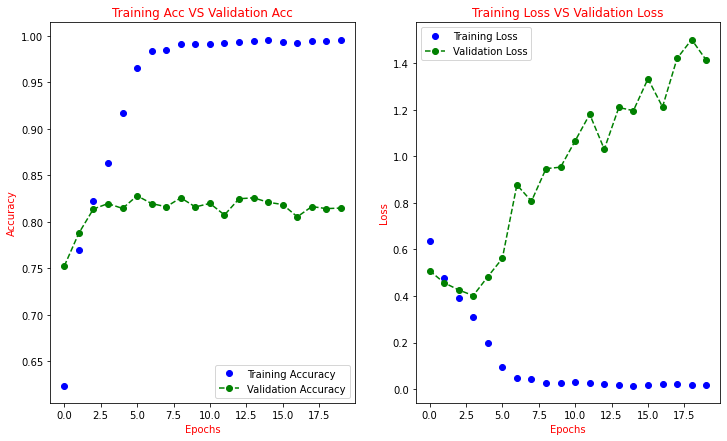

In [11]:
# Get the results
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(train_acc))

# Plotting the results
fig,axs = plt.subplots(1,2,figsize = (12,7))
axs[0].plot(epochs,train_acc,'bo',label = 'Training Accuracy')
axs[0].plot(epochs,val_acc,'go--',label = 'Validation Accuracy')
axs[0].set_title('Training Acc VS Validation Acc',color='red')
axs[0].set_xlabel('Epochs',color = 'red')
axs[0].set_ylabel('Accuracy',color='red')
axs[0].legend()

axs[1].plot(epochs,train_loss,'bo',label = 'Training Loss')
axs[1].plot(epochs,val_loss,'go--',label = 'Validation Loss')
axs[1].set_title('Training Loss VS Validation Loss',color='red')
axs[1].set_xlabel('Epochs',color = 'red')
axs[1].set_ylabel('Loss',color='red')
axs[1].legend()
plt.show()

- The loss is increased and the accuracy decreased in the validation process.

# CCN Optimization

In [12]:
# Creating image generator steps
train_datagen = ImageDataGenerator(rescale = 1/255,rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1/255)
train_gen = train_datagen.flow_from_directory(train_dir,target_size=(130,130),batch_size=50,class_mode='binary')
val_gen = val_datagen.flow_from_directory(val_dir,target_size=(130,130),batch_size=50,class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
# The CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (130,130,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [13]:
# The model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [14]:
# Fitting the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_gen,steps_per_epoch=400,epochs=20,validation_data=val_gen,validation_steps=100,verbose=1)

Epoch 1/20
400/400 [==============================] - 138s 344ms/step - loss: 0.6218 - accuracy: 0.7260 - val_loss: 0.4256 - val_accuracy: 0.8152
Epoch 2/20
400/400 [==============================] - 136s 340ms/step - loss: 0.4815 - accuracy: 0.7742 - val_loss: 0.4169 - val_accuracy: 0.8244
Epoch 3/20
400/400 [==============================] - 138s 344ms/step - loss: 0.4514 - accuracy: 0.7926 - val_loss: 0.3717 - val_accuracy: 0.8348
Epoch 4/20
400/400 [==============================] - 139s 347ms/step - loss: 0.4296 - accuracy: 0.8005 - val_loss: 0.3415 - val_accuracy: 0.8480
Epoch 5/20
400/400 [==============================] - 137s 343ms/step - loss: 0.4104 - accuracy: 0.8118 - val_loss: 0.3421 - val_accuracy: 0.8502
Epoch 6/20
400/400 [==============================] - 138s 346ms/step - loss: 0.3896 - accuracy: 0.8235 - val_loss: 0.3160 - val_accuracy: 0.8650
Epoch 7/20
400/400 [==============================] - 138s 346ms/step - loss: 0.3772 - accuracy: 0.8316 - val_loss: 0.3045 -

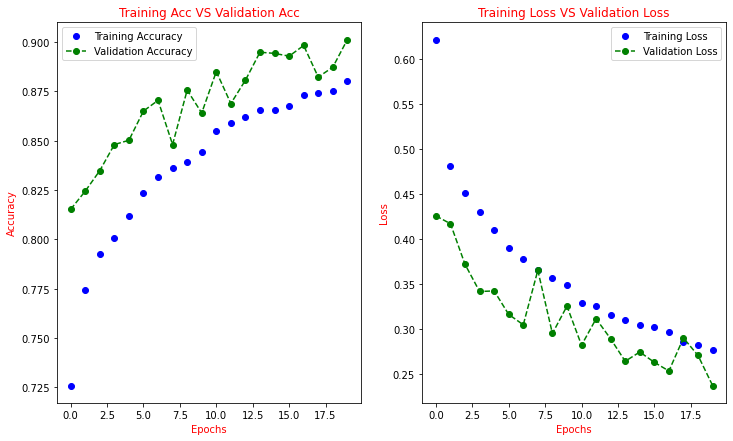

In [15]:
# Get the results
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(train_acc))

# Plotting the results
fig,axs = plt.subplots(1,2,figsize = (12,7))
axs[0].plot(epochs,train_acc,'bo',label = 'Training Accuracy')
axs[0].plot(epochs,val_acc,'go--',label = 'Validation Accuracy')
axs[0].set_title('Training Acc VS Validation Acc',color='red')
axs[0].set_xlabel('Epochs',color = 'red')
axs[0].set_ylabel('Accuracy',color='red')
axs[0].legend()

axs[1].plot(epochs,train_loss,'bo',label = 'Training Loss')
axs[1].plot(epochs,val_loss,'go--',label = 'Validation Loss')
axs[1].set_title('Training Loss VS Validation Loss',color='red')
axs[1].set_xlabel('Epochs',color = 'red')
axs[1].set_ylabel('Loss',color='red')
axs[1].legend()
plt.show()

- The preformance increased after tuning and optimizing the network.

# Preparing Testing Data

In [16]:
# The path
test_dir = '../input/dogs-vs-cats/test1.zip'
# Extracting data
extract_files(test_dir)

In [17]:
# Create the image generator
test_data_dir = '/kaggle/working/test1' 
test_df = pd.DataFrame({'Filename':os.listdir(test_data_dir)})
test_datagen = ImageDataGenerator(rescale=1/255)
test_gen = test_datagen.flow_from_dataframe(test_df,test_data_dir,target_size=(130,130),batch_size=50,x_col='Filename',y_col=None,class_mode=None)

Found 12500 validated image filenames.


In [18]:
# The first five rows 
test_df.head()

,Filename
0,10147.jpg
1,11467.jpg
2,7194.jpg
3,9495.jpg
4,6760.jpg


In [19]:
# The shape
test_df.shape

(12500, 1)

In [20]:
# Return the classes
dict((k,v) for k,v in train_gen.class_indices.items())

{'cats': 0, 'dogs': 1}

In [21]:
# Get the prediction
pred = model.predict(test_gen,steps=250)

In [23]:
# Save results
test_df['Pred'] = np.where(pred > 0.5,1,0)


In [24]:
test_df.head()

,Filename,Pred
0,10147.jpg,0
1,11467.jpg,0
2,7194.jpg,0
3,9495.jpg,0
4,6760.jpg,0


# Submission

In [25]:
# Taking a copy
test_copy = test_df.copy()

In [26]:
test_copy.head()

,Filename,Pred
0,10147.jpg,0
1,11467.jpg,0
2,7194.jpg,0
3,9495.jpg,0
4,6760.jpg,0


In [27]:
# Submit the results
test_copy['id'] = test_copy['Filename'].str.split('.').str[0]
test_copy['label'] = test_copy['Pred']
test_copy.drop(['Filename','Pred'],axis=1,inplace=True)
test_copy.to_csv('submission.csv',index = False)